In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
def parse_summary_file(dirname):
    # get summary
    with open(f"{dirname}/summary.txt","r") as file:
        lines = file.readlines()

    timing = False
    sum_dic = {}
    for i, line in enumerate(lines):
        if (i-2)%3 == 0:
            pass
        elif (i-1)%3 == 0:
            if line[0].isnumeric() or line[0] == "-":
                tmp_item = [float(line)]
            else:
                tmp_str = line.strip("\n")
                if tmp_str[0] == "[":
                    tmp_item = []
                    for ln in tmp_str.split("],"):
                        tmp_item.append([float(i) for i in ln.strip(" ").strip("[").strip("]").split(",")])
                    if line[:2] == "[[":
                        tmp_item = [tmp_item]
                else:
                    tmp_item = [tmp_str]
                pass
            if timing:
                sum_dic[tmp_key+" in s"] = tmp_item
                sum_dic[tmp_key+" in min"] = [i/60 for i in tmp_item]
            else:
                sum_dic[tmp_key.replace("pDNA","product")] = tmp_item
        else:
            tmp_key = line.strip("#----").strip("\n")
            if "Time E" in tmp_key:
                timing = True
            else:
                timing = False
    sum_df = pd.DataFrame(sum_dic).T
    sum_df.columns = [dirname]
    return sum_dic, sum_df

In [85]:
def parse_df_sm(version):
    all_df = {}
    all_sm = {}
    for file in sorted(os.listdir(f"version_{version}")):
        if ".jl" in file and "base" not in file:
            try:
                script = file[:-3]
                df = pd.read_csv(f"version_{version}/{script}/df.csv")
                sm_dic, sm_df = parse_summary_file(f"version_{version}/{script}")
                all_df[script] = df
                all_sm[script] = sm_df
            except:
                pass
            #break
    #print("DONE",all_df.keys())
    return all_df, all_sm

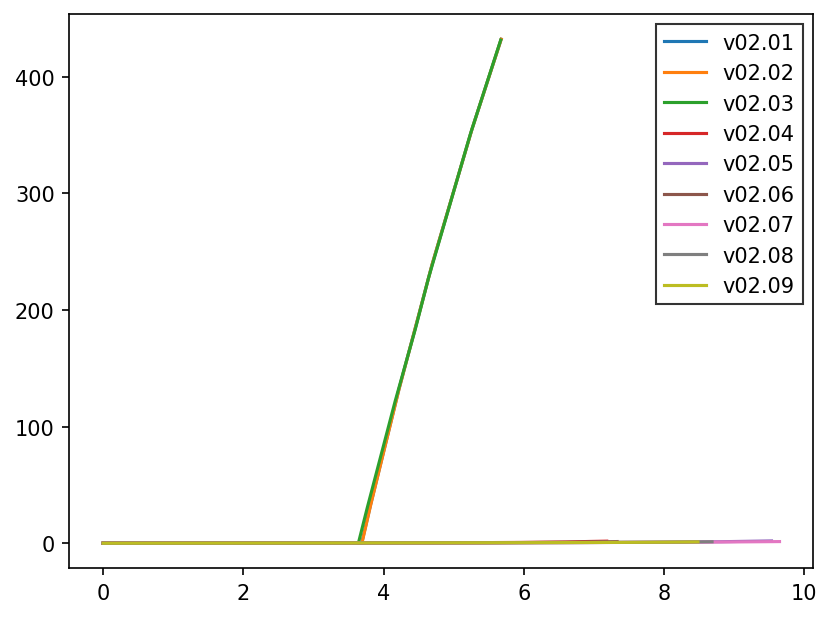

In [83]:
for script, df in all_df.items():
    plt.plot(df.t,df.P,label=script)
plt.legend()

In [98]:
versions = ["01","02","03","04"]
for version in versions:
    print(f"###################################################")
    print(f"##    version {version:11}                        ##")
    print(f"###################################################")
    print(f"Script   | Productivity  |   Mean CS   | Exec. T.  ")
    print(f"         | mmol/h        |             | min       ")
    print(f"---------|---------------|-------------|-----------")
    all_df, all_sm = parse_df_sm(version)
    for script, df in all_df.items():
        sm_df = all_sm[script]
        productivity = df.P.values[-1]/df.t.values[-1]
        mean_CS = np.mean(sm_df.loc["Complementary Slackness per CTRL interval",sm_df.columns[0]])
        t = sm_df.loc["Time Elapsed in min",sm_df.columns[0]]
        print(f"{script:8} |   {productivity:10.2f}  | {mean_CS:10.2f}  | {t:10.2f}")

###################################################
##    version 01                                 ##
###################################################
Script   | Productivity  |   Mean CS   | Exec. T.  
         | mmol/h        |             | min       
---------|---------------|-------------|-----------
v01.01   |        76.14  |     -19.38  |       1.71
v01.02   |        76.14  |     -19.37  |       1.84
v01.03   |        76.14  |     -19.09  |       4.94
v01.04   |         0.25  |  -16549.41  |       2.02
v01.05   |         0.21  |   -3165.79  |       1.57
v01.06   |         0.20  |  -18250.97  |       1.89
v01.07   |         0.15  |  -36068.57  |       2.80
v01.08   |         0.14  |  -31174.08  |       2.35
v01.09   |         0.18  |  -30978.87  |       2.47
v01.10   |         0.14  |  -48726.91  |       3.58
v01.11   |         0.14  |  -40738.52  |       4.04
v01.12   |         0.13  |  -41114.98  |       3.10
###################################################
##    versio

01 12
02 12
03 12
04 12


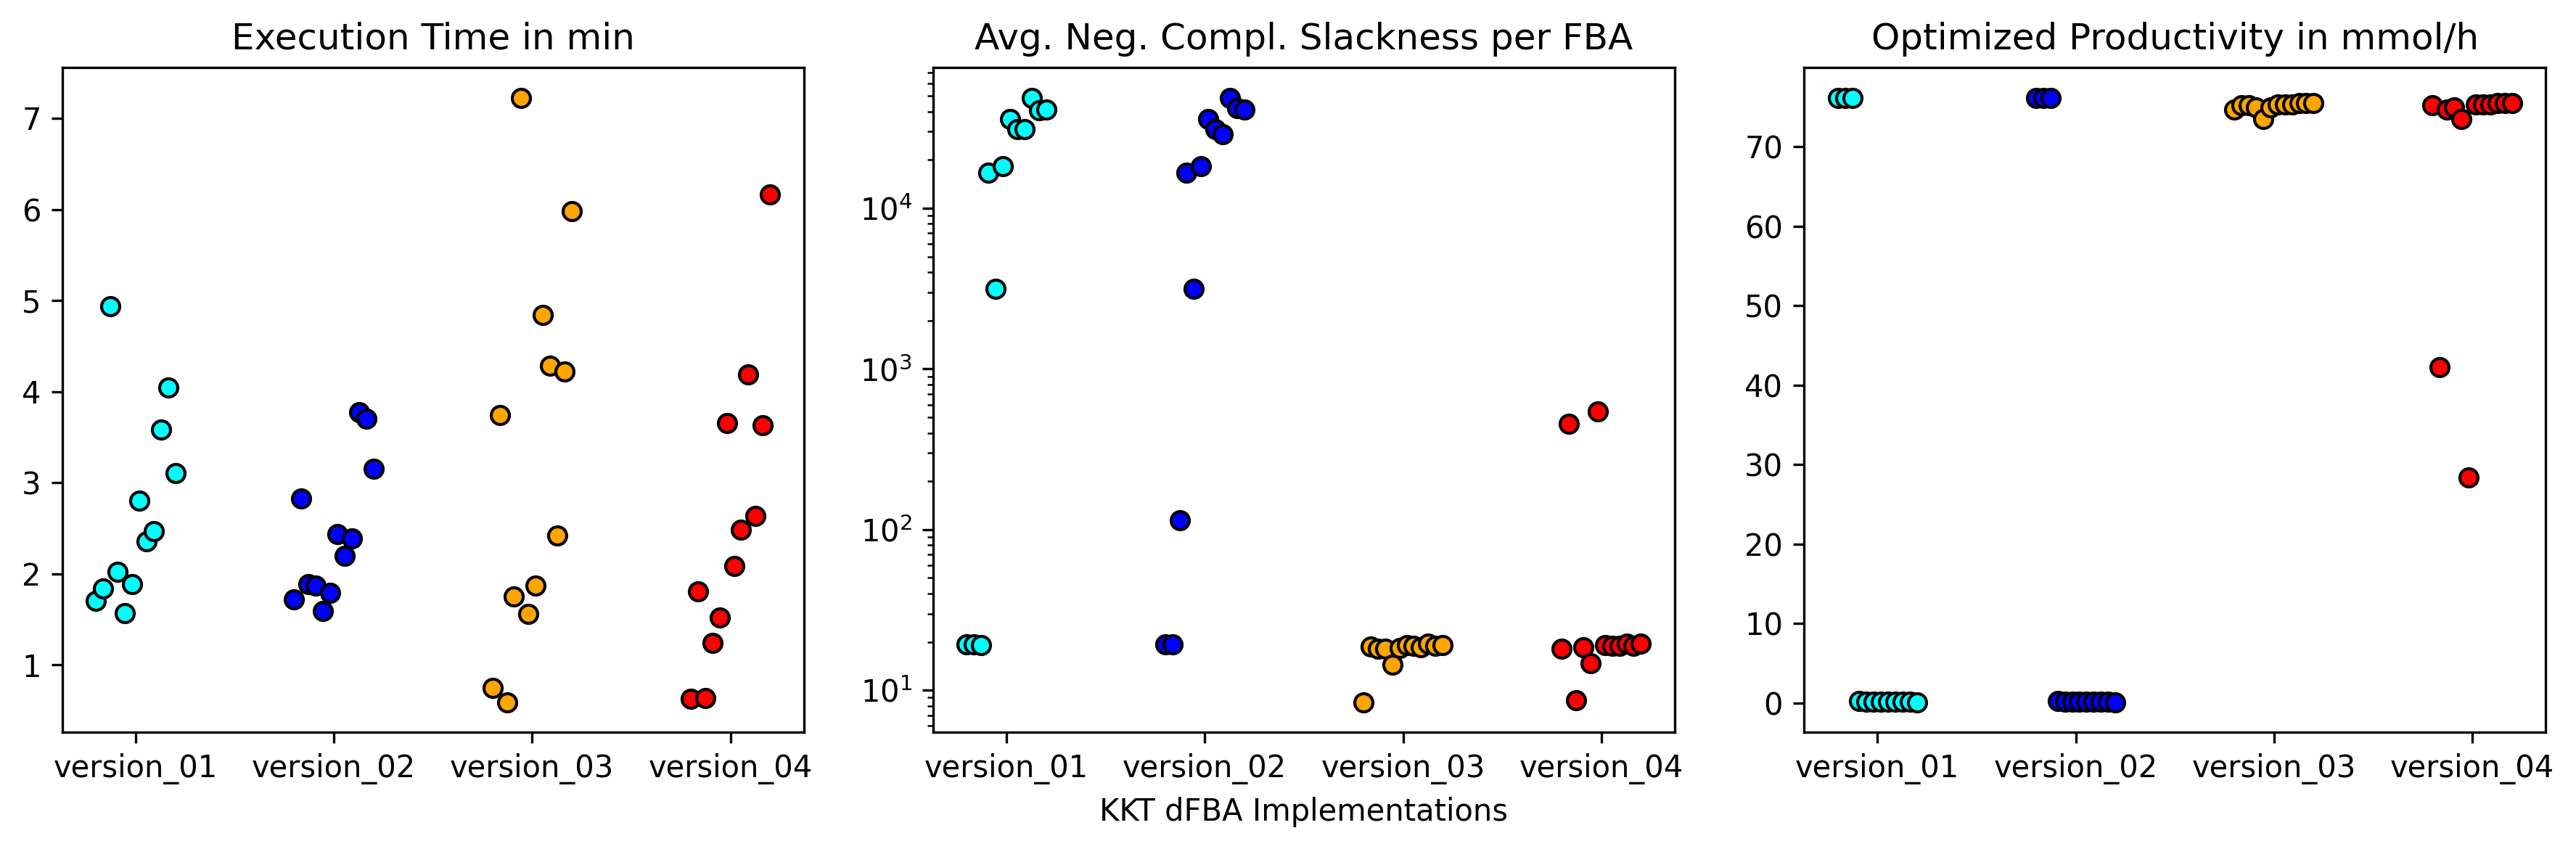

In [131]:
versions = ["01","02","03","04"]
colors = ["cyan","blue","orange","red"]
indices = range(len(versions))

fig = plt.figure(dpi=300,figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for i in indices:
    version = versions[i]
    color = colors[i]
    
    all_df, all_sm = parse_df_sm(version)
    t_list  = []
    CS_list = []
    Pt_list = []
    for script, df in all_df.items():
        sm_df = all_sm[script]
        Pt_list.append(df.P.values[-1]/df.t.values[-1])
        CS_list.append(-np.mean(sm_df.loc["Complementary Slackness per CTRL interval",sm_df.columns[0]]))
        t_list.append(sm_df.loc["Time Elapsed in min",sm_df.columns[0]])
    
    shift = .2
    offset = np.linspace(-shift,shift,len(t_list))
    ax1.scatter(i+offset,t_list ,color=color,marker="o",edgecolor="k")
    ax2.scatter(i+offset,CS_list,color=color,marker="o",edgecolor="k")
    ax3.scatter(i+offset,Pt_list,color=color,marker="o",edgecolor="k")
    print(version,len(t_list))
        
for ax in [ax1,ax2,ax3]:
    ax.set_xticks(indices)
    ax.set_xticklabels([f"version_{v}" for v in versions])
ax2.set_xlabel("KKT dFBA Implementations")
ax2.set_yscale("log")
ax1.set_title("Execution Time in min")
ax2.set_title("Avg. Neg. Compl. Slackness per FBA")
ax3.set_title("Optimized Productivity in mmol/h")

plt.tight_layout()
plt.show()